In [30]:
import pandas as pd

In [31]:
data = pd.read_csv('./insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
#find shape of dataset
data.shape

(1338, 7)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
#check null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
#overall statistics
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


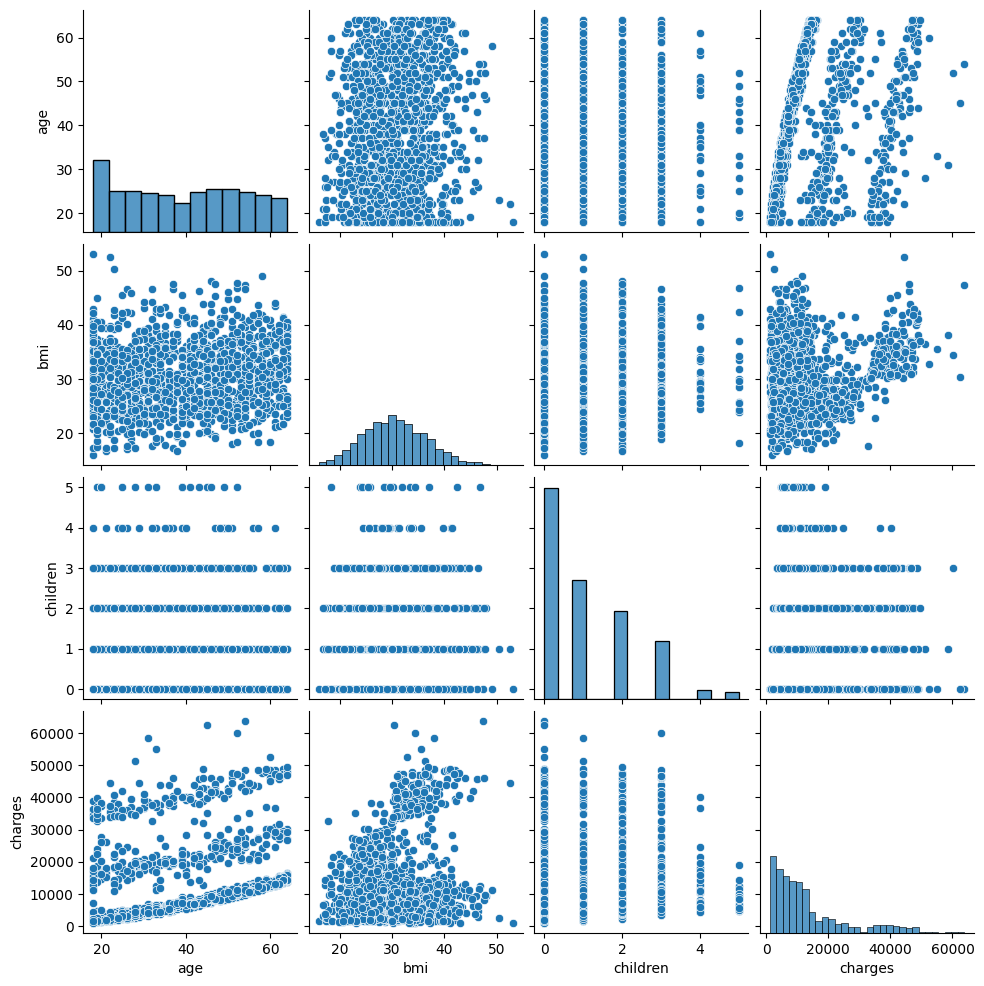

In [36]:
#seaborn for visulaization
import seaborn as sns
sns.pairplot(data)

In [37]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [38]:
# covert string to numerical values
data['sex'].map({'female' : 0, 'male': 1 })
data['sex'] = data['sex'].map({'female' : 0, 'male': 1 })
data['smoker'] = data['smoker'].map({'yes' : 0, 'no': 1 })
data['region'] = data['region'].map({'southwest' : 1, 'southeast' : 2, 'northwest': 3, 'northeast': 4 })
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520


In [39]:
#split data into X, y
data.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [40]:
X = data.drop(['charges'], axis=1)
y = data['charges']

In [41]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (1070, 6)
X_test shape : (268, 6)
y_train shape : (1070,)
y_test shape : (268,)


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [44]:
#import regression model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [45]:
#model training
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

svm_scaled = SVR()
svm_scaled.fit(X_train_scaled, y_train)
y_pred_lr_scaled = lr_scaled.predict(X_test_scaled)
y_pred_svm_scaled = svm_scaled.predict(X_test_scaled)

In [46]:
#model training
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [47]:
# prediction
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)

In [48]:
df1 = pd.DataFrame({'Actual': y_test, 'linear pred' :y_pred_lr, 'svm pred' :y_pred_svm , 
                    'random forest': y_pred_rf, 'gradient boost': y_pred_gbr})


df1

,Actual,linear pred,svm pred,random forest,gradient boost
764,9095.06825,8924.407244,9548.095432,10737.754672,11001.128629
887,5272.17580,7116.295018,9492.005195,5285.752298,5840.174656
890,29330.98315,36909.013521,9649.076063,28316.114430,28001.980112
1293,9301.89355,9507.874691,9554.920417,9625.605311,9745.291602
259,33750.29180,27013.350008,9419.697424,34355.128715,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9649.235457,46821.183467,45431.423211
575,12222.89830,11814.555568,9625.696314,12258.842554,12465.025294
535,6067.12675,7638.107736,9503.727718,6462.892941,6974.336525
543,63770.42801,40959.081722,9605.106753,46851.767952,47862.047791


In [49]:
df2 = pd.DataFrame({'Actual': y_test, 'linear pred scaled' :y_pred_lr_scaled, 'svm pred scaled' :y_pred_svm_scaled , 
                    'random forest': y_pred_rf, 'gradient boost': y_pred_gbr})

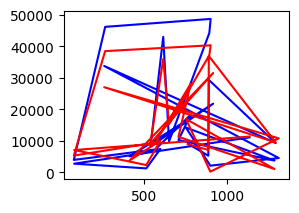

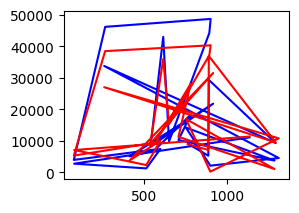

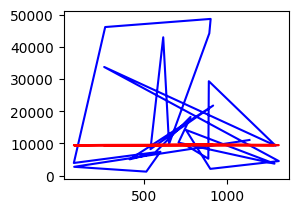

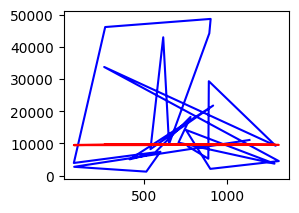

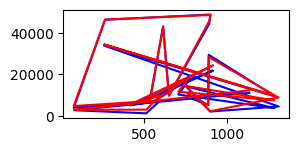

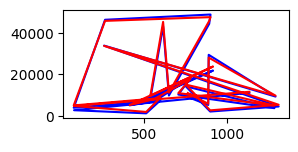

In [59]:
# performanc visualization
import matplotlib.pyplot as plt

plt.subplot(221)

plt.plot(df1['Actual'].iloc[0: 25], label='Actual', color='blue')
plt.plot( df1['linear pred'].iloc[0: 25],  label='predicted', color='red')
plt.show()

plt.subplot(222)

plt.plot(df2['Actual'].iloc[0: 25], label='Actual', color='blue')
plt.plot( df2['linear pred scaled'].iloc[0: 25],  label='predicted', color='red')
plt.show()

plt.subplot(223)

plt.plot(df1['Actual'].iloc[0: 25], label='Actual', color='blue')
plt.plot( df1['svm pred'].iloc[0: 25],  label='predicted', color='red')
plt.show()

plt.subplot(224)

plt.plot(df2['Actual'].iloc[0: 25], label='Actual', color='blue')
plt.plot( df2['svm pred scaled'].iloc[0: 25],  label='predicted', color='red')
plt.show()

plt.subplot(321)

plt.plot(df1['Actual'].iloc[0: 25], label='Actual', color='blue')
plt.plot( df1['random forest'].iloc[0: 25],  label='predicted', color='red')
plt.show()


plt.subplot(322)

plt.plot(df1['Actual'].iloc[0: 25], label='Actual', color='blue')
plt.plot( df1['gradient boost'].iloc[0: 25],  label='predicted', color='red')
plt.show()

In [51]:
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("============ Lineaer Regression =================")
print("=================================================")
# mae = mean_absolute_error(y_test,y_pred_lr)
# mse = mean_squared_error(y_test,y_pred_lr)
# rmse = np.sqrt(mse)

r_squared_lr = r2_score(y_test,y_pred_lr)
# print('mean_absolute_error(mae) : ', mae)
# print('mean_squared_error(mse) : ', mse)
# print('root_mean_squared_error(rmse) : ', rmse)
print('R2  : ', r_squared_lr)

r_squared_lr_scaled = r2_score(y_test,y_pred_lr_scaled)
# print('mean_absolute_error(mae) : ', mae)
# print('mean_squared_error(mse) : ', mse)
# print('root_mean_squared_error(rmse) : ', rmse)
print('R2 scaled : ', r_squared_lr_scaled)

print("============ SVM Regression =================")
print("=============================================")
# mae = mean_absolute_error(y_test,y_pred_svm)
# mse = mean_squared_error(y_test,y_pred_svm)
# rmse = np.sqrt(mse)

r_squared_svm = r2_score(y_test,y_pred_svm)
# print('mean_absolute_error(mae) : ', mae)
# print('mean_squared_error(mse) : ', mse)
# print('root_mean_squared_error(rmse) : ', rmse)
print('R2  : ', r_squared_svm)

r_squared_svm_scaled = r2_score(y_test,y_pred_svm_scaled)
# print('mean_absolute_error(mae) : ', mae)
# print('mean_squared_error(mse) : ', mse)
# print('root_mean_squared_error(rmse) : ', rmse)
print('R2 scaled : ', r_squared_svm_scaled)
print("============ Random Forest Regression =================")
print("=======================================================")

# mae = mean_absolute_error(y_test,y_pred_rf)
# mse = mean_squared_error(y_test,y_pred_rf)
# rmse = np.sqrt(mse)

r_squared = r2_score(y_test,y_pred_rf)
# print('mean_absolute_error(mae) : ', mae)
# print('mean_squared_error(mse) : ', mse)
# print('root_mean_squared_error(rmse) : ', rmse)
print('R2  : ', r_squared)


print("============ Gradient Boost Rregression =================")
print("=======================================================")

# mae = mean_absolute_error(y_test,y_pred_gbr)
# mse = mean_squared_error(y_test,y_pred_gbr)
# rmse = np.sqrt(mse)

r_squared = r2_score(y_test,y_pred_gbr)
# print('mean_absolute_error(mae) : ', mae)
# print('mean_squared_error(mse) : ', mse)
# print('root_mean_squared_error(rmse) : ', rmse)
print('R2  : ', r_squared)

============ Lineaer Regression =================
R2  :  0.7833463107364539
R2 scaled :  0.7833463107364537
============ SVM Regression =================
R2  :  -0.07229022268882468
R2 scaled :  -0.06821813183902203
============ Random Forest Regression =================
R2  :  0.8650870998172954
============ Gradient Boost Rregression =================
R2  :  0.8779726251291786


In [52]:
# predict charge for new customers
data = {'age' : 29,
        'sex': 1,
        'bmi' : 24.8,
        'children':0,
        'smoker': 0,
        'region' : 1
        }
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,29,1,24.8,0,0,1


In [53]:
#for scaling applied

data_new ={'age' : 29,
        'sex': 1,
        'bmi' : 24.8,
        'children':0,
        'smoker': 0,
        'region' : 1
        }
df_new = pd.DataFrame(data_new,index=[0])
df_new

,age,sex,bmi,children,smoker,region
0,29,1,24.8,0,0,1


In [54]:
new_pred = gbr.predict(df)
new_pred_lr = lr.predict(df)
print("non-scaled gbr: ",new_pred)
print("non-scaled lr: ", new_pred_lr)

non-scaled gbr:  [17959.89572992]
non-scaled lr:  [26650.57989644]


In [55]:
#scling aplied
df_scaled = scaler.transform(df_new)
pred_scaled = gbr.predict(df_new)
pred_scaled_lr = lr_scaled.predict(df_scaled)

print(" gbr: ",pred_scaled)
print("scaled lr: ", pred_scaled_lr)

 gbr:  [17959.89572992]
scaled lr:  [26650.57989644]


In [56]:
# save model

import pickle
with open('gradientboost_insurance_pred_model.pkl', 'wb') as file:
    pickle.dump(gbr, file)

In [57]:
# predcit using model
gbr_insurance_model = pickle.load(open('./gradientboost_insurance_pred_model.pkl', 'rb'))


In [58]:
pred = gbr_insurance_model.predict(df)
print("Pred value is  : ",pred[0])

Pred value is  :  17959.895729920005
